In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import connectome

config = connectome.get_config()
from paths import PROJECT_ROOT

from connectome.core.utils import get_image_paths, select_random_images

from connectome.core.data_processing import DataProcessor

# Input activations

In [6]:
training_images = get_image_paths(os.path.join(PROJECT_ROOT, "images", "one_to_ten", "train", "blue"), 100)
data_processor = DataProcessor(config)

In [7]:
batch_files, already_selected = select_random_images(training_images, 100, [])
images, labels = data_processor.get_data_from_paths(batch_files)

In [8]:
voronoi_color = "white"
voronoi_width = 1

def plot_voronoi_cells_with_neurons(self, neuron_data, ax):
    # Set black background
    ax.set_facecolor("black")

    # Modern color palette that pops on black:
    self.color_map = {
        "R1-6": "#ffffff",  # Bright mint
        "R7": "#1e90ff",  # Bright rose
        "R8p": "#50ff50",  # Bright gold
        "R8y": "#ff4d4d",  # Bright cyan
    }

    plot_data = neuron_data.copy()

    jitter_size = 4

    non_r1_6_mask = plot_data["cell_type"] != "R1-6"

    # Generate random choices between x and y jitter for each point
    x_choice = np.random.choice([-jitter_size, jitter_size], size=len(plot_data))

    # Where xy_choice is 0, make yx_choice ±2
    y_choice = np.random.choice([-jitter_size, jitter_size], size=len(plot_data))

    # Apply jitter only to non-R1-6 neurons
    plot_data.loc[non_r1_6_mask, "x_axis"] += x_choice[non_r1_6_mask]
    plot_data.loc[non_r1_6_mask, "y_axis"] += y_choice[non_r1_6_mask]

    plot_data["color"] = plot_data["cell_type"].apply(lambda x: self.color_map[x])

    self._plot_voronoi_cells(ax, line_color=voronoi_color, line_width=voronoi_width)

    plot_data["y_axis"] = self.pixel_num - 1 - plot_data["y_axis"]

    # Plot neurons with improved visibility
    for cell_type, color in self.color_map.items():
        points = plot_data[plot_data["cell_type"] == cell_type]
        ax.scatter(
            points["x_axis"],
            points["y_axis"],
            color=color,
            s= 1 if cell_type == "R1-6" else 5,  
            alpha=0.8 if cell_type == "R1-6" else 1, 
            label=cell_type,
        )

    # Legend with white text
    legend = ax.legend(title="Cell Types", loc="lower right", frameon=True)
    legend.get_frame().set_facecolor("black")
    legend.get_frame().set_edgecolor("white")
    plt.setp(legend.get_texts(), color="white")
    plt.setp(legend.get_title(), color="white")

    self.clip_image(ax)

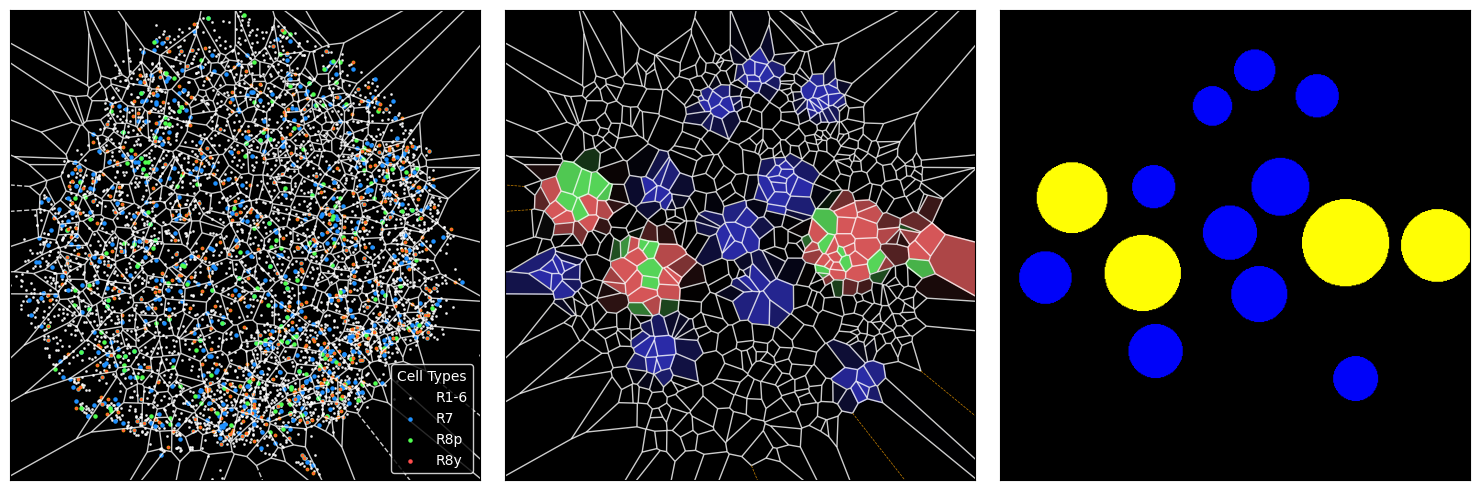

In [9]:
%matplotlib inline
img = images[6]
plt.close("all")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_voronoi_cells_with_neurons(
    data_processor.voronoi_cells, data_processor.tesselated_neurons, axes[0]
)
data_processor.plot_neuron_activations(img, axes[1], voronoi_color, voronoi_width)
data_processor.voronoi_cells.plot_input_image(img, axes[2])

# Add panel labels
"""for ax, label in zip(axes, ["a", "b", "c"]):
    ax.text(
        0.05,
        0.93,
        label,
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        color="white",
    )"""

plt.tight_layout()
plt.show()
# plt.savefig("plots/stripes.pdf", dpi=300, bbox_inches="tight")

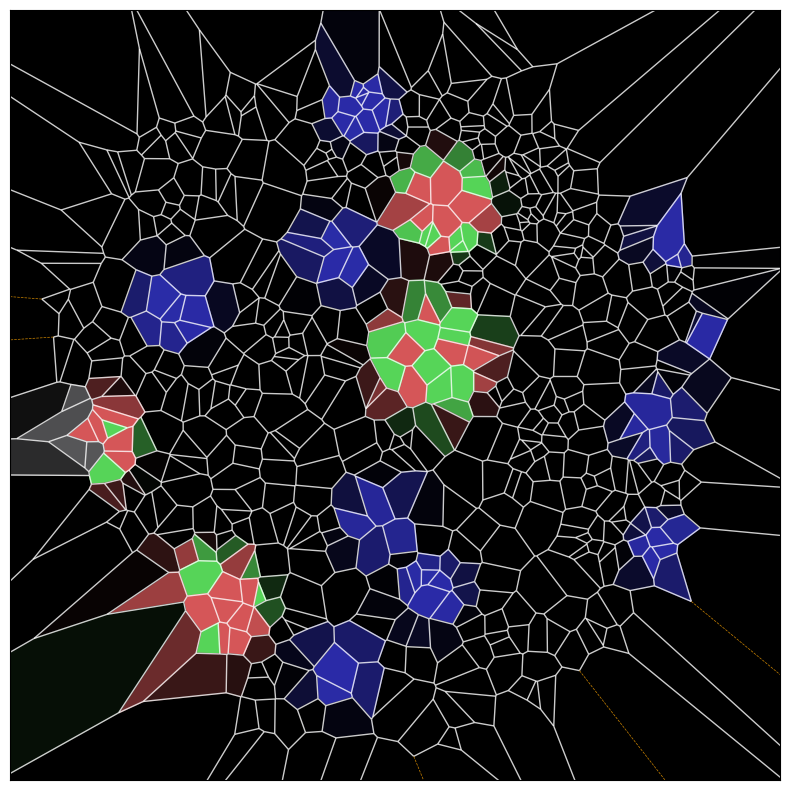

In [15]:
%matplotlib inline
img = images[2]
plt.close("all")

# Second plot
plt.figure(figsize=(8, 8))
data_processor.plot_neuron_activations(img, plt.gca(), voronoi_color, voronoi_width)
plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(PROJECT_ROOT, "plots/activations.svg"), dpi=1000, bbox_inches="tight")

In [31]:
# Third plot
plt.figure(figsize=(8, 8))
data_processor.voronoi_cells.plot_input_image(img, plt.gca())
plt.tight_layout()
plt.savefig("plots/input_image.png", dpi=1000, bbox_inches="tight")

In [4]:
training_images = get_image_paths("images/two_shapes3/train/star", 10)
data_processor1 = DataProcessor(config)
batch_files, already_selected = select_random_images(training_images, 10, [])
images1, labels = data_processor1.get_data_from_paths(batch_files)
training_images = get_image_paths("images/two_colors/train/blue", 10)
data_processor2 = DataProcessor(config)
data_processor2.classes = ["blue", "yellow"]
batch_files, already_selected = select_random_images(training_images, 10, [])
images2, labels = data_processor2.get_data_from_paths(batch_files)

In [5]:
img1 = images1[0]
img2 = images2[1]

In [30]:
%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('#d3d3d3')
gs = fig.add_gridspec(2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 1], 
                     hspace=-0.38, wspace=0.05,)
                     #left=0.05, right=0.95, top=0.95, bottom=0.05)

ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0, 2])    
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 2])    
ax5 = fig.add_subplot(gs[1, 3]) 

axes = [ax1, ax2, ax3, ax4, ax5]

# First row - original image
plot_voronoi_cells_with_neurons(
    data_processor1.voronoi_cells, data_processor1.tesselated_neurons, ax1
)
data_processor1.plot_neuron_activations(img1, ax2, voronoi_color, voronoi_width)
data_processor1.voronoi_cells.plot_input_image(img1, ax3)

# Second row - new image
data_processor2.plot_neuron_activations(img2, ax4, voronoi_color, voronoi_width)
data_processor2.voronoi_cells.plot_input_image(img2, ax5)

# Add panel labels to all subplots
labels = ["a", "b", "c", "d", "e"]
for ax, label in zip(axes, ["a", "b", "c", "d", "e"]):
    ax.text(
        0.05,
        0.95 if label == "a" else 0.9,
        label,
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        color="white",
    )

# plt.tight_layout()
# plt.show()
plt.savefig("plots/input_tesselation.pdf", dpi=300, bbox_inches="tight")

# ANS results

In [16]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.4)

In [17]:
df = pd.read_csv("../../supplementary_data/one_to_ten.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../supplementary_data/one_to_ten.csv'

In [4]:
def plot_weber_fraction(results_df: pd.DataFrame) -> plt.Figure:
    # Calculate the percentage of correct answers for each Weber ratio
    results_df["yellow"] = results_df["Image"].apply(
        lambda x: os.path.basename(x).split("_")[1]
    )
    results_df["blue"] = results_df["Image"].apply(
        lambda x: os.path.basename(x).split("_")[2]
    )
    try:
        results_df["weber_ratio"] = results_df.apply(
            lambda row: max(int(row["yellow"]), int(row["blue"]))
            / min(int(row["yellow"]), int(row["blue"])),
            axis=1,
        )
    except ZeroDivisionError:
        results_df["weber_ratio"] = 0
    results_df["equalized"] = results_df["Image"].apply(
        lambda x: "equalized" in os.path.basename(x).lower()
    )

    correct_percentage = (
        results_df.groupby(["weber_ratio", "equalized"])["Is correct"].mean() * 100
    )
    correct_percentage = correct_percentage.reset_index()
    # because matplotlib is very stupid:
    correct_percentage["weber_ratio"] = correct_percentage["weber_ratio"].round(3)

    # Plot
    fig = plt.figure(figsize=(10, 6))
    sns.barplot(
        x="weber_ratio", y="Is correct", hue="equalized", data=correct_percentage
    )
    plt.xlabel("Weber Ratio")
    plt.ylabel("Percentage of Correct Answers")
    plt.title("Correct Classification by Weber Ratio and Image Equalization")
    plt.tight_layout()

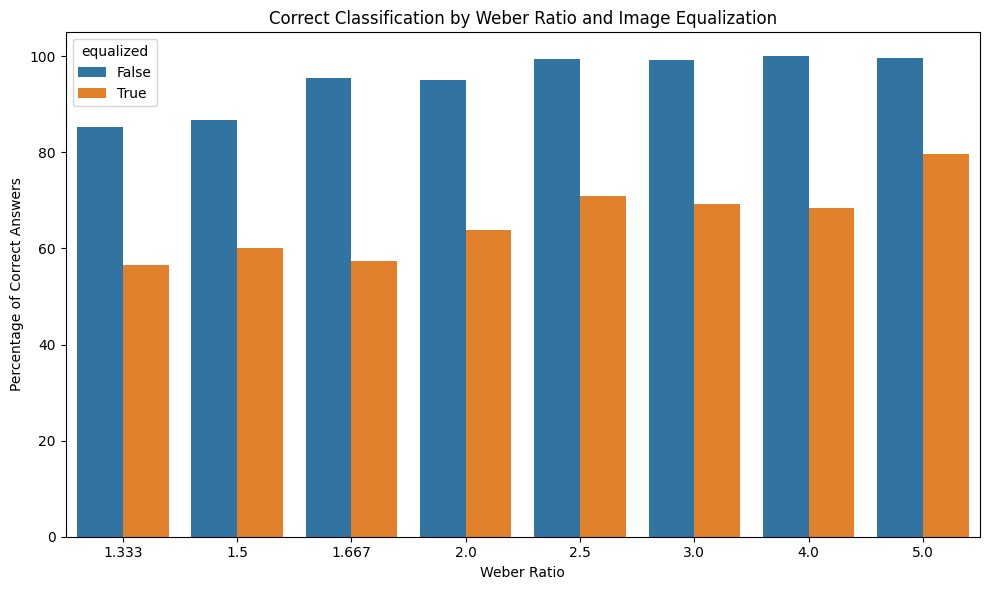

In [9]:
plot_weber_fraction(df)
plt.savefig("plots/weber_fraction.png", dpi=300, bbox_inches="tight")

In [18]:
def plot_weber_fraction(results_df: pd.DataFrame, save_path: str = None) -> plt.Figure:
    """
    Create a publication-quality plot showing classification accuracy by Weber ratio.

    Args:
        results_df (pd.DataFrame): DataFrame containing the experimental results
        save_path (str, optional): Path to save the figure

    Returns:
        plt.Figure: The generated figure object
    """

    font_size = 12

    # Data preparation
    results_df["yellow"] = results_df["Image"].apply(
        lambda x: os.path.basename(x).split("_")[1]
    )
    results_df["blue"] = results_df["Image"].apply(
        lambda x: os.path.basename(x).split("_")[2]
    )

    # Calculate Weber ratio with error handling
    try:
        results_df["weber_ratio"] = results_df.apply(
            lambda row: max(int(row["yellow"]), int(row["blue"]))
            / min(int(row["yellow"]), int(row["blue"])),
            axis=1,
        )
    except ZeroDivisionError:
        results_df["weber_ratio"] = 0

    results_df["equalized"] = results_df["Image"].apply(
        lambda x: "equalized" in os.path.basename(x).lower()
    )

    # Calculate mean and standard error
    correct_percentage = (
        results_df.groupby(["weber_ratio", "equalized"])["Is correct"]
        .agg(["mean", "std", "count"])
        .reset_index()
    )
    correct_percentage["mean"] *= 100
    correct_percentage["std"] *= 100
    correct_percentage["se"] = correct_percentage["std"] / np.sqrt(
        correct_percentage["count"]
    )
    correct_percentage["weber_ratio"] = correct_percentage["weber_ratio"].round(3)

    # Set style for publication
    plt.style.use("seaborn-v0_8-white")

    # Create figure with Nature-compatible dimensions
    # Nature requires figures to be 89 mm or 183 mm wide
    width_mm = 183
    width_inches = width_mm / 25.4
    height_inches = width_inches * 0.75  # Using golden ratio
    fig, ax = plt.subplots(figsize=(width_inches, height_inches), dpi=300)

    # Plot data points and error bars
    conditions = [False, True]
    labels = ["Non-equalized", "Surface-equalized"]
    colors = ["#2166AC", "#B2182B"]  # Colorblind-friendly palette

    for condition, label, color in zip(conditions, labels, colors):
        data = correct_percentage[correct_percentage["equalized"] == condition]
        ax.errorbar(
            data["weber_ratio"],
            data["mean"],
            yerr=data["se"],
            label=label,
            color=color,
            marker="o",
            markersize=5,
            capsize=3,
            capthick=1,
            linewidth=1.5,
            linestyle="-",
        )

    # Customize appearance
    ax.set_xlabel("Weber Ratio", fontsize=font_size)
    ax.set_ylabel("Classification Accuracy (%)", fontsize=font_size)
    ax.tick_params(axis="both", which="major", labelsize=font_size)
    ax.spines[["right", "top"]].set_visible(False)

    # Add legend
    ax.legend(fontsize=font_size, frameon=False, loc="lower right")

    # Set y-axis limits with some padding
    ax.set_ylim(40, 105)

    # Add grid
    ax.yaxis.grid(True, linestyle="--", alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    return fig

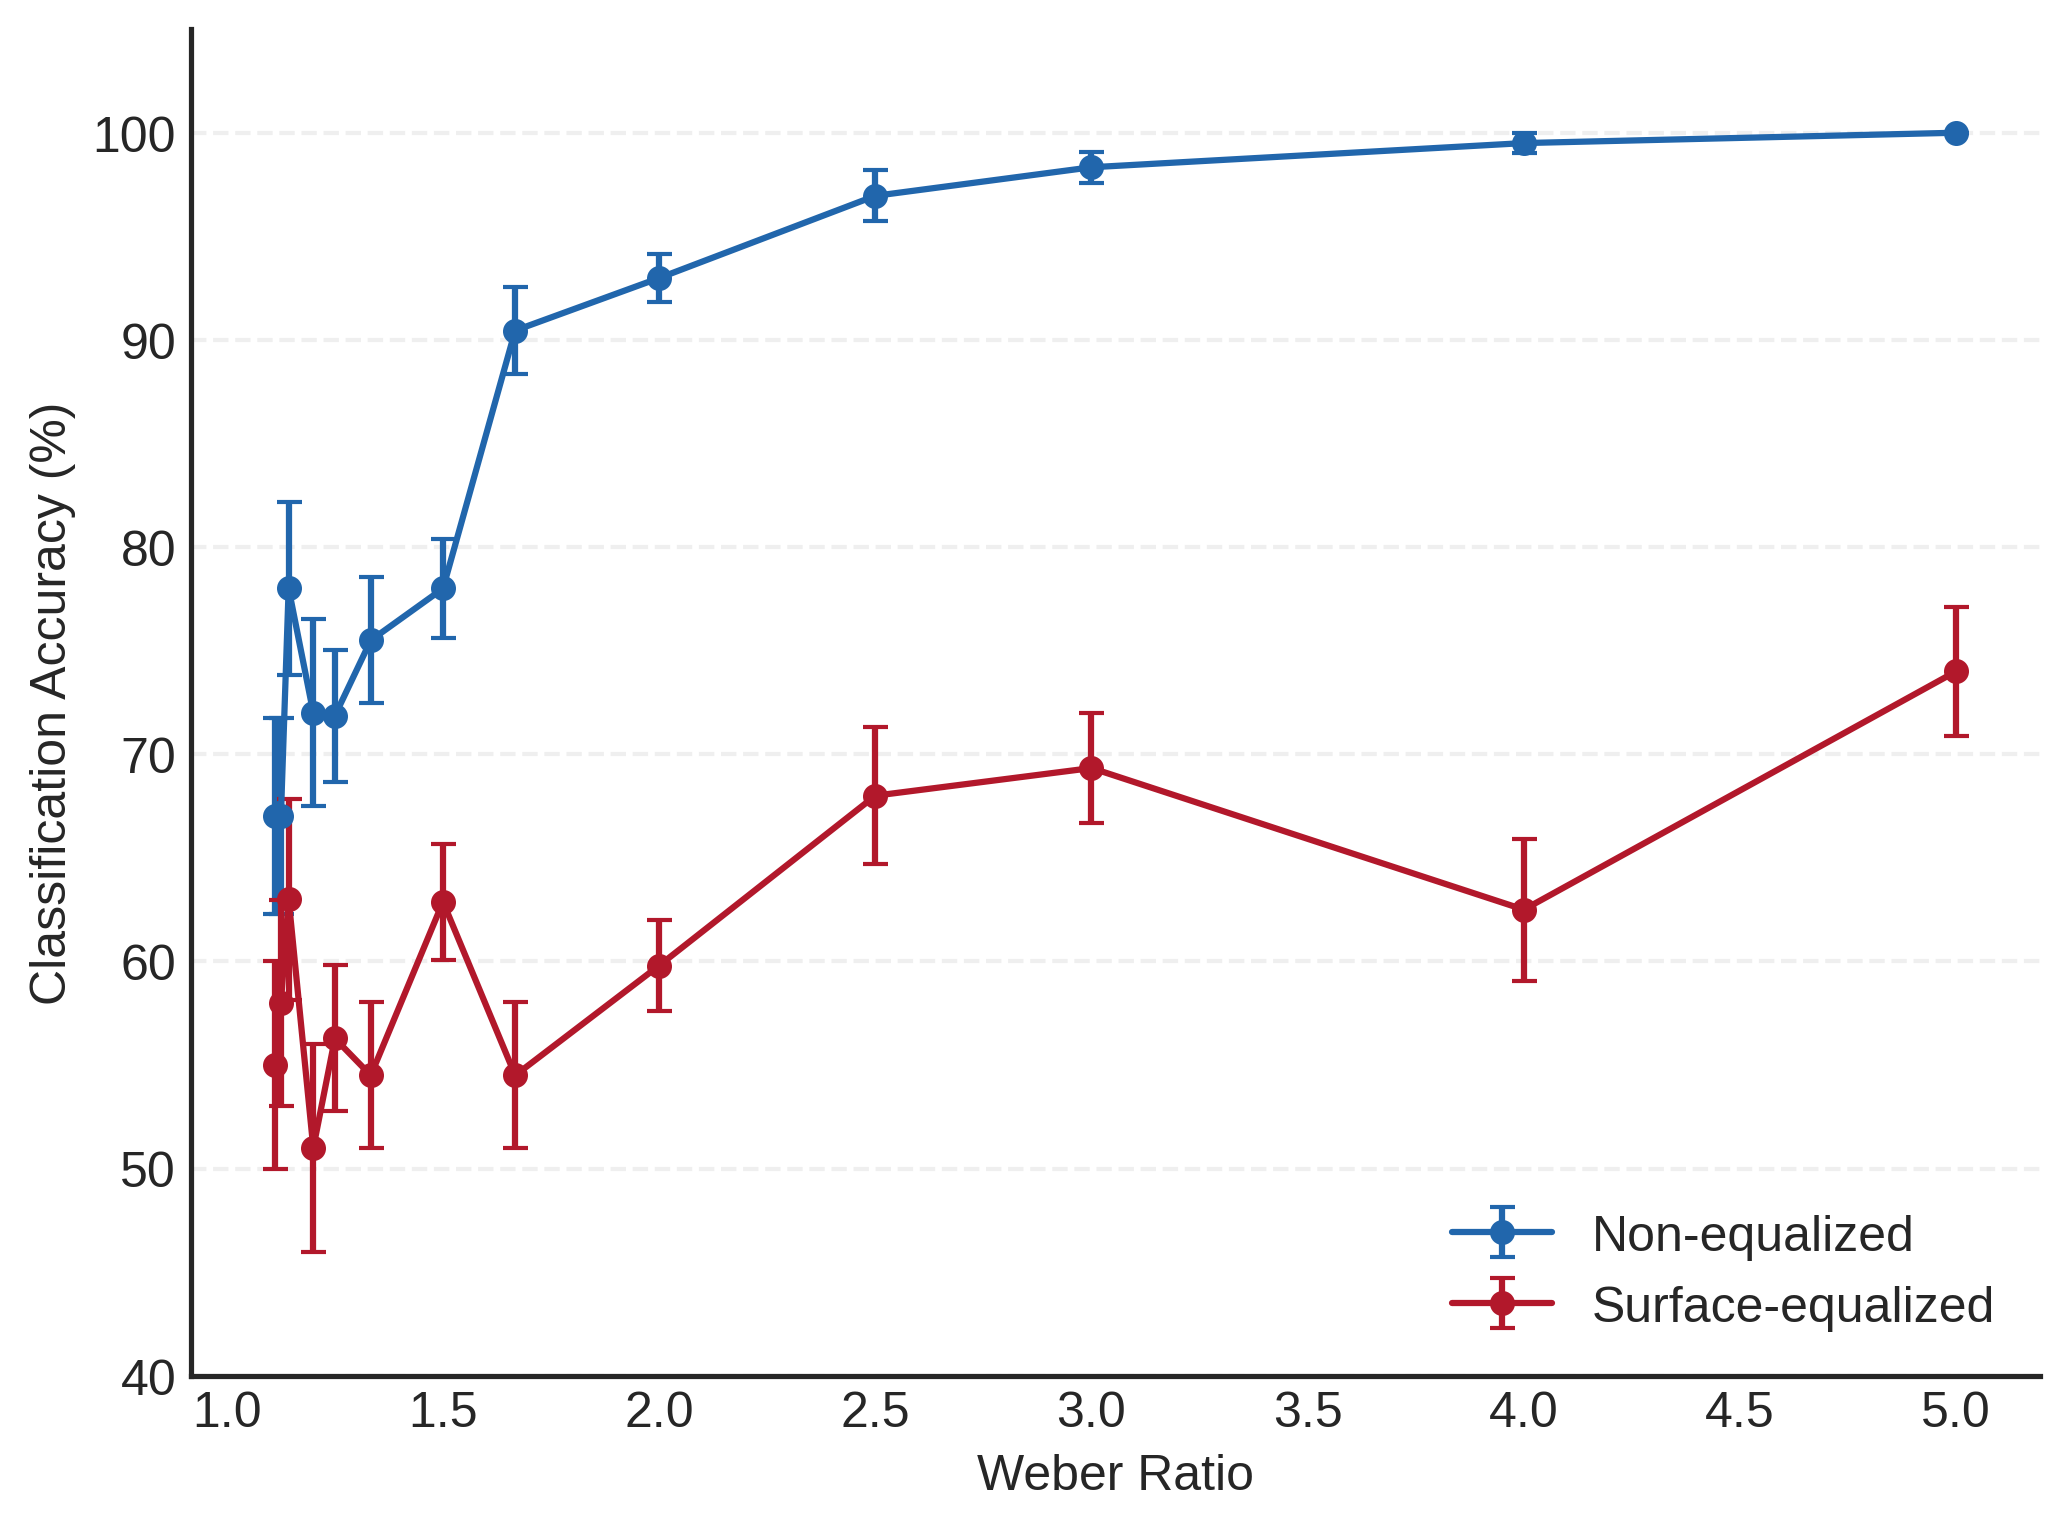

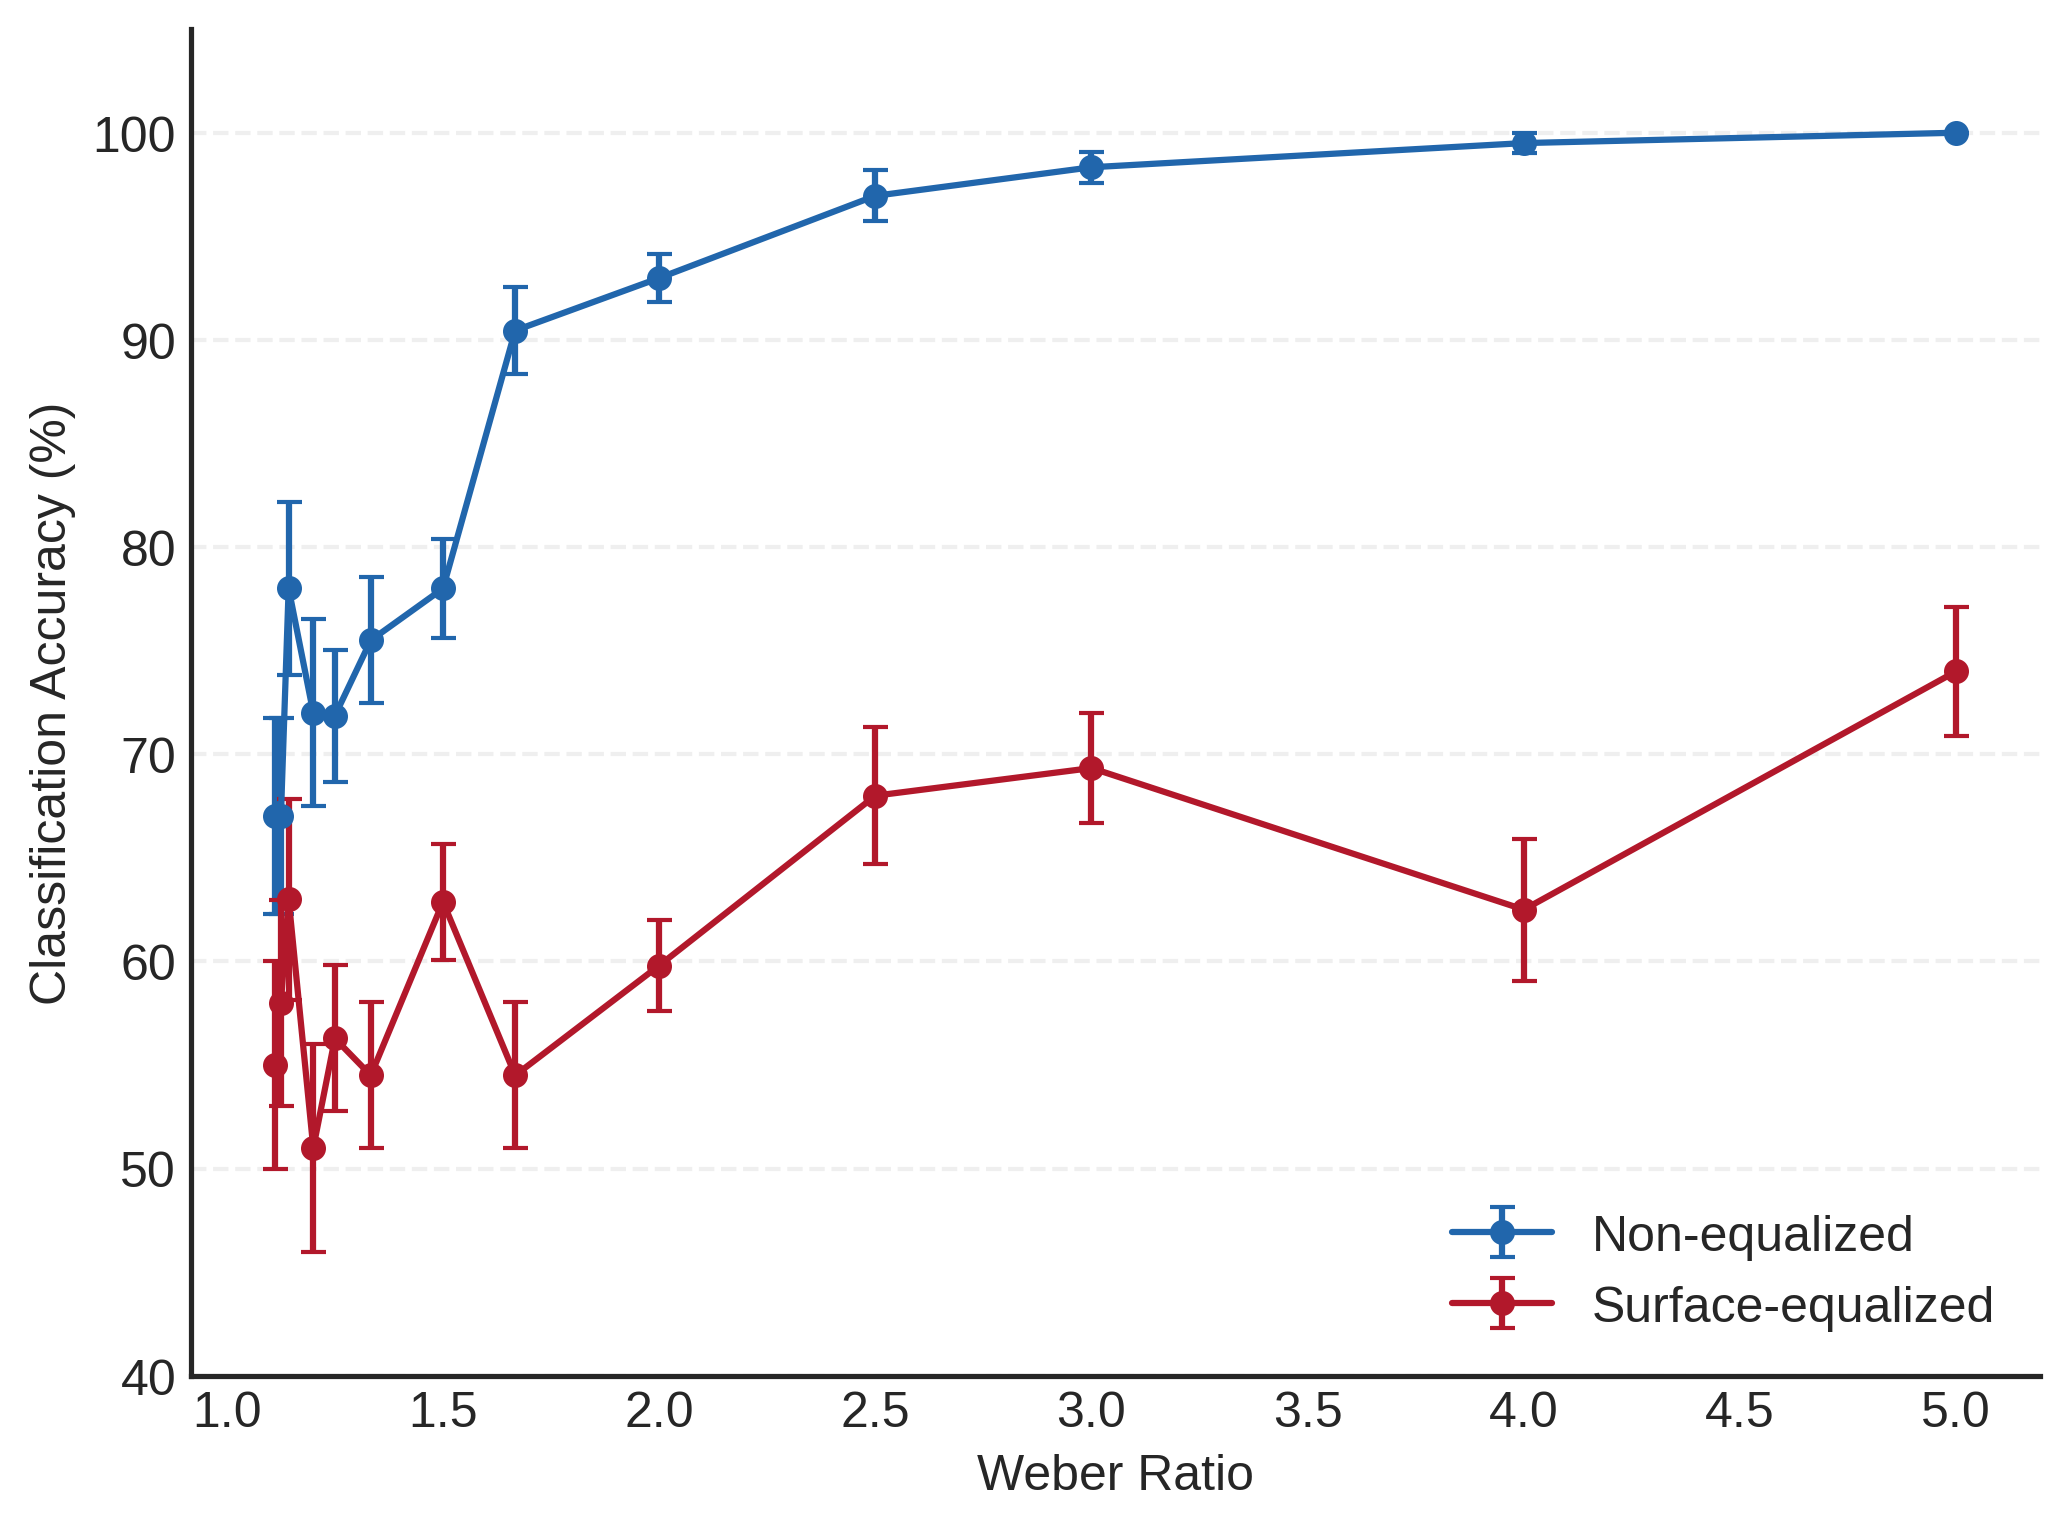

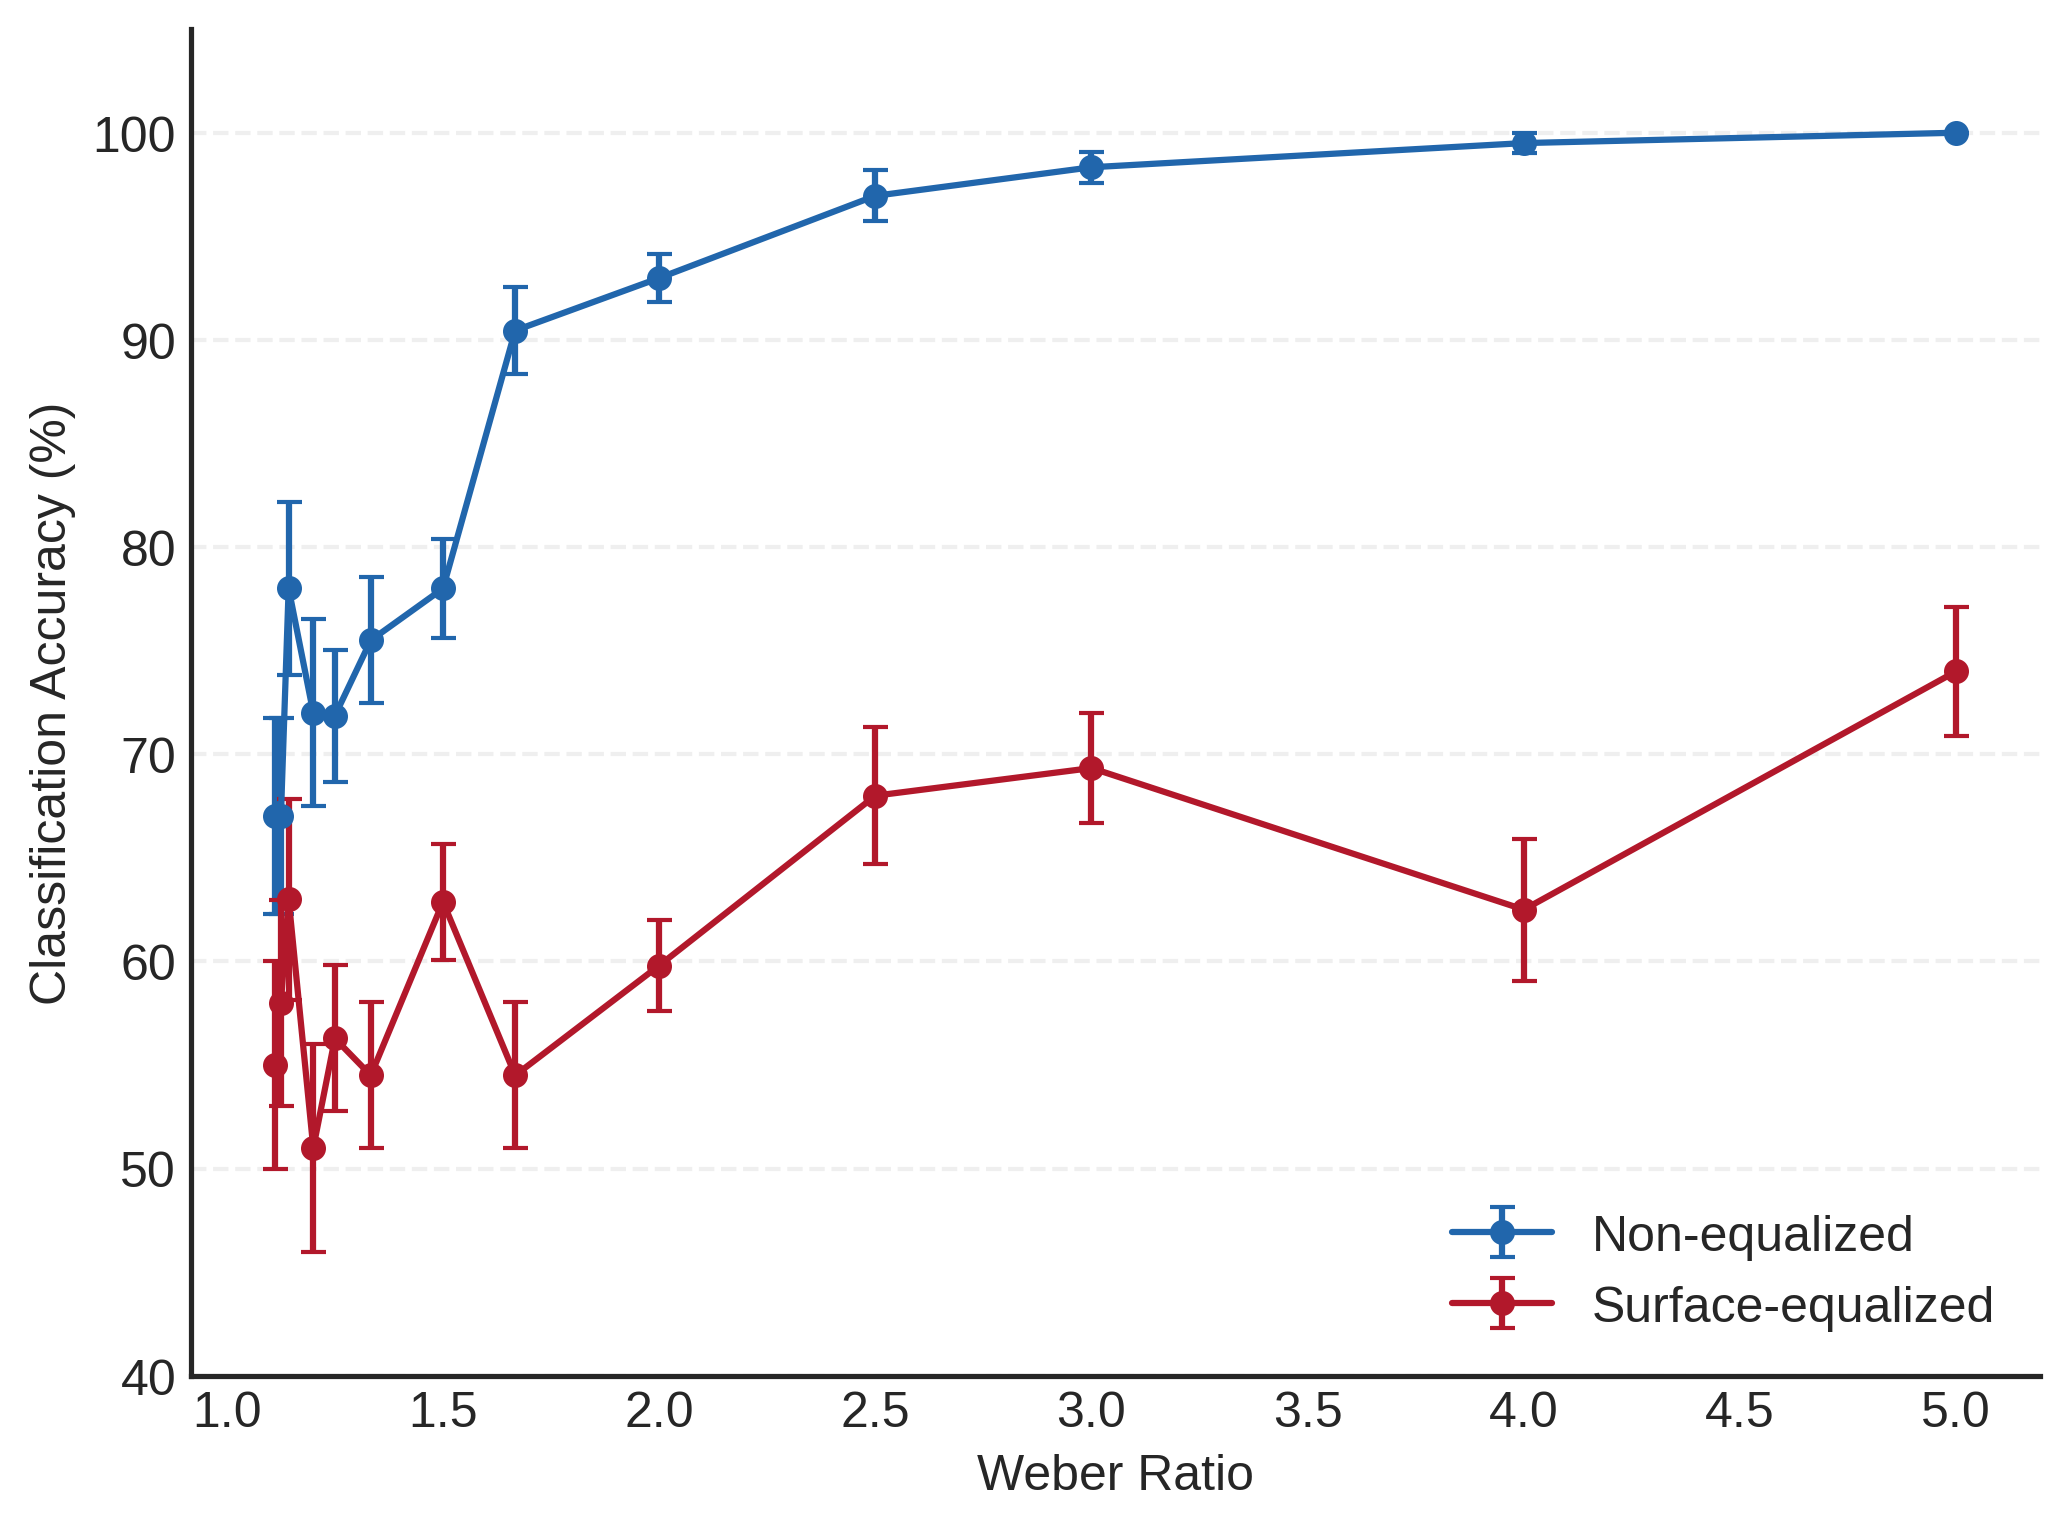

In [ ]:
plot_weber_fraction(df, "../../plots/weber_fraction.pdf")
plot_weber_fraction(df, "../../plots/weber_fraction.png")